In [1]:
# Import dependent libraries

import pandas as pd
import numpy as np
import plotly.express as pe
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as pp
from sklearn.linear_model import LinearRegression

In [2]:
# Import Dataset

dataset = pd.read_csv('/Users/vamsimeenavilli/BITS/Sem - 2/IDS/Assignment/BC-data.csv')

Data Pre Processing:

In [3]:
# Visualize DataSet

dataset.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
# Descriptive summary of data

dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


id is not required further, there is a junk column added at last, so removing these two columns.

In [5]:
# Removing id, last column

dataset.drop(['id', 'Unnamed: 32'], axis = 'columns', inplace = True)

In [6]:
# Identify Categorical variables

dataset.describe(include = 'object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [7]:
# Convert Diagnosis column into Numerical Values.

dataset.replace({'diagnosis' : {'B' : 1, 'M' : 2}}, inplace = True)
dataset.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
# Identify Null Values

dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Identify Duplicate Rows

print(sum(dataset.duplicated(keep = 'first').to_list()))

0


In [10]:
# Identify And Remove Outlier Rows

print("Outliers Identified And Removed in:")
for column in dataset.columns.to_list()[1:]:
    percentile25 = dataset[column].quantile(0.25)
    percentile75 = dataset[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    if (dataset[dataset[column] < lower_limit - 1 ].any  and dataset[dataset[column] > upper_limit + 1].any):
        print('\t', column)
    dataset = dataset[dataset[column].between(lower_limit, upper_limit + 1)]

Outliers Identified And Removed in:
	 radius_mean
	 texture_mean
	 perimeter_mean
	 area_mean
	 smoothness_mean
	 compactness_mean
	 concavity_mean
	 concave points_mean
	 symmetry_mean
	 fractal_dimension_mean
	 radius_se
	 texture_se
	 perimeter_se
	 area_se
	 smoothness_se
	 compactness_se
	 concavity_se
	 concave points_se
	 symmetry_se
	 fractal_dimension_se
	 radius_worst
	 texture_worst
	 perimeter_worst
	 area_worst
	 smoothness_worst
	 compactness_worst
	 concavity_worst
	 concave points_worst
	 symmetry_worst
	 fractal_dimension_worst


In [11]:
# Normalize dataset

normalized_dataset = pd.DataFrame(preprocessing.normalize(dataset), columns = dataset.columns.tolist())
normalized_dataset.head(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.002859,0.016325,0.029133,0.110899,0.551920,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021313,0.037881,0.141332,0.811512,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
1,0.002240,0.013945,0.017585,0.092486,0.534397,0.000143,0.000190,0.000177,0.000091,0.000234,...,0.017328,0.026602,0.115818,0.830662,0.000201,0.000588,0.000600,0.000195,0.000446,0.000139


Feature Selection:
    starting the two stage feature selction as implemented in the paper.

Stage 1:

Filtering Feature Selection:

In [12]:
filtering_data_set = normalized_dataset.copy(deep = True)
correlation_map = filtering_data_set.drop(
    'diagnosis',
    axis = 1
).apply(
    lambda x : x.corr(filtering_data_set.diagnosis)
).sort_values(
    ascending = False
)
print(correlation_map)

fractal_dimension_worst    0.781099
smoothness_worst           0.780542
symmetry_worst             0.770909
fractal_dimension_mean     0.767581
smoothness_mean            0.749722
symmetry_mean              0.746127
perimeter_worst            0.737328
radius_worst               0.717668
smoothness_se              0.683943
texture_worst              0.681600
texture_mean               0.665191
symmetry_se                0.656053
perimeter_mean             0.650154
radius_mean                0.632792
compactness_mean           0.596801
texture_se                 0.584704
perimeter_se               0.527326
radius_se                  0.522674
fractal_dimension_se       0.510687
compactness_worst          0.510549
compactness_se             0.462477
concave points_se          0.369001
area_se                    0.352391
concavity_mean             0.333740
concavity_worst            0.327728
concave points_worst       0.305527
concavity_se               0.290380
concave points_mean        0

In [13]:
# Get High Correlation Variables with Target:
#   Threshold: 0.4

variables = correlation_map.keys()
high_correlation_variables = [variables[i] for i in range(len(correlation_map)) if np.abs(correlation_map[i]) > 0.4]
print(*high_correlation_variables, sep = '\n')

fractal_dimension_worst
smoothness_worst
symmetry_worst
fractal_dimension_mean
smoothness_mean
symmetry_mean
perimeter_worst
radius_worst
smoothness_se
texture_worst
texture_mean
symmetry_se
perimeter_mean
radius_mean
compactness_mean
texture_se
perimeter_se
radius_se
fractal_dimension_se
compactness_worst
compactness_se


In [14]:
# Identify high correlations between the variables:

target_correlated_dataset = filtering_data_set[high_correlation_variables]
high_correlation_map = {}
for i in high_correlation_variables:
    high_correlation_map[i] = []
    for j in high_correlation_variables:
        if i != j and target_correlated_dataset[i].corr(target_correlated_dataset[j]) > 0.75:
            high_correlation_map[i].append(j)

In [15]:
# Visualizing high correlated values:

high_correlated_variables = {}

for key, values in high_correlation_map.items():
    if len(values) > 0:
        correlated_variables = key + ", " + ", ".join(values)
        high_correlated_variables[len(correlated_variables)] = correlated_variables

print(*high_correlated_variables.values(), sep = '\n')

fractal_dimension_worst, smoothness_worst, symmetry_worst, fractal_dimension_mean, smoothness_mean, symmetry_mean, perimeter_worst, radius_worst, smoothness_se, perimeter_mean, radius_mean, compactness_mean, fractal_dimension_se
smoothness_worst, fractal_dimension_worst, symmetry_worst, fractal_dimension_mean, smoothness_mean, symmetry_mean, perimeter_worst, radius_worst, smoothness_se, perimeter_mean, radius_mean
symmetry_worst, fractal_dimension_worst, smoothness_worst, fractal_dimension_mean, smoothness_mean, symmetry_mean, perimeter_worst, radius_worst, symmetry_se, perimeter_mean, radius_mean
radius_mean, fractal_dimension_worst, smoothness_worst, symmetry_worst, fractal_dimension_mean, smoothness_mean, symmetry_mean, perimeter_worst, radius_worst, smoothness_se, texture_worst, texture_mean, symmetry_se, perimeter_mean
smoothness_mean, fractal_dimension_worst, smoothness_worst, symmetry_worst, fractal_dimension_mean, symmetry_mean, perimeter_worst, radius_worst, smoothness_se, sym

Now we can have any one variable from each line and can drop the rest of them.

In [16]:
# Drop High correlation columns

unique_correlated_values = []
for i in high_correlated_variables.values():
    unique_correlated_values.extend(i.split(', '))

drop_columns = []
for i in high_correlated_variables.values():
    column_set = i.split(', ')
    for j in range(len(column_set)):
        if column_set[j] in unique_correlated_values:
            drop_columns.extend(column_set[: j])
            drop_columns.extend(column_set[j + 1 :])
            continue

filtering_data_set.drop(set(drop_columns) ,axis = 1, inplace = True)
filtering_data_set.head(2)

,diagnosis,area_mean,concavity_mean,concave points_mean,area_se,concavity_se,concave points_se,area_worst,concavity_worst,concave points_worst
0,0.002859,0.551920,0.000345,0.000150,0.038925,0.000081,0.000027,0.811512,0.000982,0.000368
1,0.002240,0.534397,0.000177,0.000091,0.030455,0.000041,0.000013,0.830662,0.000600,0.000195


In [17]:
# Split target and features

target = filtering_data_set.iloc[:, 0].values.tolist()
features = filtering_data_set.iloc[:, 1:].values.tolist()


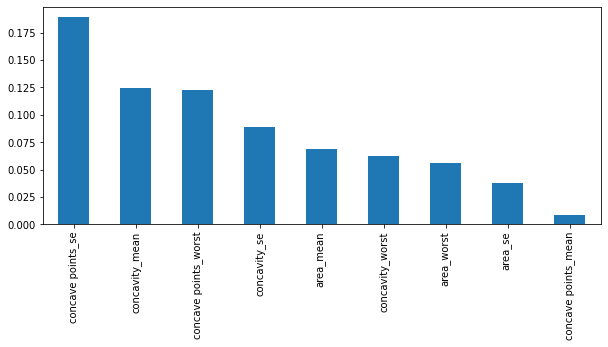

In [18]:
# Apply mutual_info_regression for information gain and mutual information.

mi = pd.Series(mutual_info_regression(features, target))
mi.index = filtering_data_set.columns[1:]
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))
filtering_feature_selection = set(mi.sort_values(ascending = False).keys())

Wrapper Feature Selection:

In [19]:
# Sequential Forward Selection(sfs)

sfs = SFS(LinearRegression(), k_features = 11, forward = True, floating = False, scoring = 'r2', cv = 0)
target = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]
sfs.fit(features, target)
wrapper_feature_selection = sfs.k_feature_names_
print(*wrapper_feature_selection, sep = '\n')

radius_mean
texture_mean
compactness_mean
concavity_mean
concave points_mean
smoothness_se
concavity_se
radius_worst
area_worst
concave points_worst
symmetry_worst


Embeded Feature Selection

In [20]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
x = dataset.iloc[:, 1:]
sel.fit(x, dataset.iloc[:, 0])
embeded_feature_selection = x.columns[(sel.get_support())]
print(*embeded_feature_selection, sep = '\n')

texture_mean
concavity_mean
concave points_mean
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
concavity_worst
concave points_worst


Stage 2: Common true condition 

In [21]:
# Features with common true condition

common_true_features = filtering_feature_selection.intersection(wrapper_feature_selection, embeded_feature_selection)
print(common_true_features)

{'concave points_worst', 'concave points_mean', 'area_worst', 'concavity_mean'}


Implementation of Naive Bayes classification

Generic Naive Bayes function

In [22]:
def GenericNB(feature_names):
    if type(feature_names) != list:
        feature_names = list(feature_names)

    # Split Data Into Train and Test:
    # Splitiing data in 70:30 ratio.

    features = dataset[feature_names]
    target = dataset.iloc[:, 0]
    features_train, features_test, target_train, target_test = train_test_split(
        features,
        target,
        test_size = 0.30,
        random_state = 0
    )

    # Feature Scaling:
    # Normalizing the values.

    scaler = preprocessing.StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_test = scaler.transform(features_test)

    # Naive Bayes:
    # Implementing the classifier.

    classifier = GaussianNB()
    classifier.fit(features_train, target_train.ravel())
    features_predicted = classifier.predict(features_test)

    # Evaluation
    results = {}
    results['confusion_matrix'] = confusion_matrix(features_predicted, target_test)
    results['Precision_Score'] = precision_score(features_predicted, target_test)
    results['Recall_Score'] = recall_score(features_predicted, target_test)
    results['F1_Score'] = f1_score(features_predicted, target_test)
    results['AUC-ROC_Score'] = roc_auc_score(features_predicted, target_test)
    results['Accuracy_Score'] = accuracy_score(features_predicted, target_test)

    return results

    

    


Applying all feature selections on naive bayes classifier

In [23]:
results = {}
results['filtering_feature'] = GenericNB(filtering_feature_selection)
results['wrapper_feature'] = GenericNB(wrapper_feature_selection)
results['embeded_feature'] = GenericNB(embeded_feature_selection)
results['common_true_feature'] = GenericNB(common_true_features)

Comparing Feature Selection approaches

In [24]:
metrics = ['Precision_Score', 'Recall_Score', 'F1_Score', 'AUC-ROC_Score', 'Accuracy_Score']

print(' ' * 20, *metrics, sep = '\t')

for i in results:
    print(i.ljust(20), end = '\t')
    for j in metrics:
        print("{:.2f}".format(results[i][j]), end = '\t\t ')
    print()

                    	Precision_Score	Recall_Score	F1_Score	AUC-ROC_Score	Accuracy_Score
filtering_feature   	0.93		 0.97		 0.95		 0.87		 0.92		 
wrapper_feature     	0.94		 0.97		 0.96		 0.89		 0.93		 
embeded_feature     	0.94		 0.98		 0.96		 0.89		 0.94		 
common_true_feature 	0.94		 0.96		 0.95		 0.88		 0.92		 
